## 로이터 데이터셋

1986년에 로이터에서 공개한 짧은 뉴스 기사와 토픽의 집합인 로이터 데이터셋을 사용하겠습니다. 이 데이터셋은 텍스트 분류를 위해 널리 사용되는 간단한 데이터셋입니다. 46개의 토픽이 있으며 어떤 토픽은 다른 것에 비해 데이터가 많습니다. 각 토픽은 훈련 세트에 최소한 10개의 샘플을 가지고 있습니다.


In [1]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


In [2]:
len(train_data)

8982

In [3]:
len(test_data)

2246

In [4]:
word_index = reuters.get_word_index()
word_index

565248/550378 [==============================] - 0s 0us/step


{'mdbl': 10996,
 'fawc': 16260,
 'degussa': 12089,
 'woods': 8803,
 'hanging': 13796,
 'localized': 20672,
 'sation': 20673,
 'chanthaburi': 20675,
 'refunding': 10997,
 'hermann': 8804,
 'passsengers': 20676,
 'stipulate': 20677,
 'heublein': 8352,
 'screaming': 20713,
 'tcby': 16261,
 'four': 185,
 'grains': 1642,
 'broiler': 20680,
 'wooden': 12090,
 'wednesday': 1220,
 'highveld': 13797,
 'duffour': 7593,
 '0053': 20681,
 'elections': 3914,
 '270': 2563,
 '271': 3551,
 '272': 5113,
 '273': 3552,
 '274': 3400,
 'rudman': 7975,
 '276': 3401,
 '277': 3478,
 '278': 3632,
 '279': 4309,
 'dormancy': 9381,
 'errors': 7247,
 'deferred': 3086,
 'sptnd': 20683,
 'cooking': 8805,
 'stratabit': 20684,
 'designing': 16262,
 'metalurgicos': 20685,
 'databank': 13798,
 '300er': 20686,
 'shocks': 20687,
 'nawg': 7972,
 'tnta': 20688,
 'perforations': 20689,
 'affiliates': 2891,
 '27p': 20690,
 'ching': 16263,
 'china': 595,
 'wagyu': 16264,
 'affiliated': 3189,
 'chino': 16265,
 'chinh': 16266,
 '

In [5]:
reverse_index = dict([(value,key) for (key,value) in word_index.items()])
reverse_index

{10996: 'mdbl',
 16260: 'fawc',
 12089: 'degussa',
 8803: 'woods',
 13796: 'hanging',
 20672: 'localized',
 20673: 'sation',
 20675: 'chanthaburi',
 10997: 'refunding',
 8804: 'hermann',
 20676: 'passsengers',
 20677: 'stipulate',
 8352: 'heublein',
 20713: 'screaming',
 16261: 'tcby',
 185: 'four',
 1642: 'grains',
 20680: 'broiler',
 12090: 'wooden',
 1220: 'wednesday',
 13797: 'highveld',
 7593: 'duffour',
 20681: '0053',
 3914: 'elections',
 2563: '270',
 3551: '271',
 5113: '272',
 3552: '273',
 3400: '274',
 7975: 'rudman',
 3401: '276',
 3478: '277',
 3632: '278',
 4309: '279',
 9381: 'dormancy',
 7247: 'errors',
 3086: 'deferred',
 20683: 'sptnd',
 8805: 'cooking',
 20684: 'stratabit',
 16262: 'designing',
 20685: 'metalurgicos',
 13798: 'databank',
 20686: '300er',
 20687: 'shocks',
 7972: 'nawg',
 20688: 'tnta',
 20689: 'perforations',
 2891: 'affiliates',
 20690: '27p',
 16263: 'ching',
 595: 'china',
 16264: 'wagyu',
 3189: 'affiliated',
 16265: 'chino',
 16266: 'chinh',
 2

In [6]:
decoded_newswire = ' '.join([reverse_index.get(i-3 ,'?') for i in train_data[0]])
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [7]:
#데이터 인코딩
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# 훈련 데이터 벡터 변환
x_train = vectorize_sequences(train_data)
# 테스트 데이터 벡터 변환
x_test = vectorize_sequences(test_data)

In [8]:
# 레이블 벡터로 변환
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

# 훈련 레이블 벡터 변환
one_hot_train_labels = to_one_hot(train_labels)
# 테스트 레이블 벡터 변환
one_hot_test_labels = to_one_hot(test_labels)

In [9]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [10]:
#모델 구성
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
# 각 차원은 다른 출력 클래스가 인코딩 됨
model.add(layers.Dense(46, activation='softmax'))

In [11]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
#훈련검증
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [13]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 4s 134ms/step - loss: 2.6379 - accuracy: 0.5331 - val_loss: 1.7231 - val_accuracy: 0.6410
Epoch 2/20
16/16 [==============================] - 1s 86ms/step - loss: 1.4188 - accuracy: 0.7088 - val_loss: 1.3126 - val_accuracy: 0.7100
Epoch 3/20
16/16 [==============================] - 1s 93ms/step - loss: 1.0628 - accuracy: 0.7791 - val_loss: 1.1684 - val_accuracy: 0.7360
Epoch 4/20
16/16 [==============================] - 2s 106ms/step - loss: 0.8393 - accuracy: 0.8244 - val_loss: 1.0561 - val_accuracy: 0.7750
Epoch 5/20
16/16 [==============================] - 1s 85ms/step - loss: 0.6721 - accuracy: 0.8584 - val_loss: 0.9749 - val_accuracy: 0.7980
Epoch 6/20
16/16 [==============================] - 1s 86ms/step - loss: 0.5368 - accuracy: 0.8869 - val_loss: 0.9478 - val_accuracy: 0.7930
Epoch 7/20
16/16 [==============================] - 1s 92ms/step - loss: 0.4316 - accuracy: 0.9084 - val_loss: 0.9379 - val_accuracy: 0.7960
Epoch 8/20


In [14]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

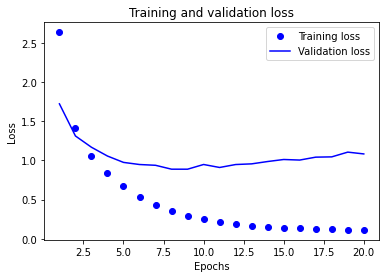

In [15]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

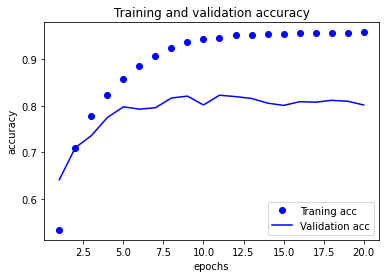

In [16]:
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs,acc,'bo',label='Traning acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')

plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

9번째부터 과대적합 

In [17]:
model = models.Sequential()
#만개만 뽑았으니깐 만개만 들어간다
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
#64개만 나와 
model.add(layers.Dense(64,activation='relu'))
#최종 출력층 , 46개 쓸건데 , 소프트맥스 함수를 사용해 확률값을 가짐
#각 입력 샘플마다 46개의 출력클래스에 대한 확률분포 출력
model.add(layers.Dense(46,activation='softmax'))

model.compile(optimizer='rmsprop',
              loss= 'categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val,y_val))
results = model.evaluate(x_test,one_hot_test_labels)
results

Epoch 1/9
16/16 [==============================] - 2s 68ms/step - loss: 2.4257 - accuracy: 0.5411 - val_loss: 1.5952 - val_accuracy: 0.6490
Epoch 2/9
16/16 [==============================] - 1s 54ms/step - loss: 1.3347 - accuracy: 0.7119 - val_loss: 1.2457 - val_accuracy: 0.7150
Epoch 3/9
16/16 [==============================] - 1s 55ms/step - loss: 1.0021 - accuracy: 0.7793 - val_loss: 1.0821 - val_accuracy: 0.7670
Epoch 4/9
16/16 [==============================] - 1s 54ms/step - loss: 0.7919 - accuracy: 0.8290 - val_loss: 0.9987 - val_accuracy: 0.7860
Epoch 5/9
16/16 [==============================] - 1s 53ms/step - loss: 0.6249 - accuracy: 0.8698 - val_loss: 0.9664 - val_accuracy: 0.7910
Epoch 6/9
16/16 [==============================] - 1s 55ms/step - loss: 0.5003 - accuracy: 0.8993 - val_loss: 0.9268 - val_accuracy: 0.7980
Epoch 7/9
16/16 [==============================] - 1s 53ms/step - loss: 0.4054 - accuracy: 0.9154 - val_loss: 0.8698 - val_accuracy: 0.8100
Epoch 8/9
16/16 [===

[0.9877536296844482, 0.7796081900596619]

In [18]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) ==np.array(test_labels_copy)
float(np.sum(hits_array))/len(test_labels)

0.18833481745325023

In [19]:
#새로운 데이터 예측
prediction = model.predict(x_test)
prediction

array([[9.6537424e-06, 5.3601500e-05, 1.4857427e-05, ..., 1.7962817e-05,
        4.3195556e-07, 1.5633767e-06],
       [4.4954605e-03, 1.6530778e-02, 6.2746774e-05, ..., 6.1655206e-05,
        5.4303535e-05, 1.7292208e-04],
       [1.2597322e-02, 6.7630076e-01, 2.6237674e-03, ..., 5.2712637e-04,
        1.5518185e-03, 5.3486292e-04],
       ...,
       [1.0539204e-05, 9.6603799e-05, 4.3043296e-05, ..., 5.4207547e-05,
        3.4250063e-06, 8.0730160e-06],
       [1.6969061e-03, 2.1272175e-02, 2.3782782e-03, ..., 1.2037479e-03,
        3.0923562e-04, 6.3885777e-04],
       [1.4880786e-03, 5.4760092e-01, 7.0160992e-02, ..., 9.2294780e-05,
        6.9177634e-04, 9.7494056e-05]], dtype=float32)

In [20]:
prediction[0].shape

(46,)

In [21]:
np.sum(prediction[0])

1.0

In [22]:
np.argmax(prediction[0])

3

In [23]:
y_train = np.array(train_labels)
y_test = np.array(train_labels)
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])


In [24]:
# 중간을 충분히 큰 층을 줘야하는 이유
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 2s 24ms/step - loss: 3.0276 - accuracy: 0.2970 - val_loss: 2.3942 - val_accuracy: 0.3760
Epoch 2/20
63/63 [==============================] - 1s 21ms/step - loss: 2.0145 - accuracy: 0.4569 - val_loss: 1.7278 - val_accuracy: 0.5800
Epoch 3/20
63/63 [==============================] - 1s 20ms/step - loss: 1.5004 - accuracy: 0.6223 - val_loss: 1.4927 - val_accuracy: 0.6080
Epoch 4/20
63/63 [==============================] - 1s 20ms/step - loss: 1.2620 - accuracy: 0.6721 - val_loss: 1.4121 - val_accuracy: 0.6460
Epoch 5/20
63/63 [==============================] - 1s 21ms/step - loss: 1.1029 - accuracy: 0.7140 - val_loss: 1.3484 - val_accuracy: 0.6740
Epoch 6/20
63/63 [==============================] - 1s 20ms/step - loss: 0.9774 - accuracy: 0.7454 - val_loss: 1.3140 - val_accuracy: 0.6880
Epoch 7/20
63/63 [==============================] - 1s 20ms/step - loss: 0.8778 - accuracy: 0.7841 - val_loss: 1.3117 - val_accuracy: 0.7040
Epoch 8/20
63

[과제 유닛수를 32개, 128개로 조정하고  한 개의 은닉층을 세 개의 은닉층 활용 

In [25]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 2s 24ms/step - loss: 1.7378 - accuracy: 0.6305 - val_loss: 1.1797 - val_accuracy: 0.7330
Epoch 2/20
63/63 [==============================] - 1s 21ms/step - loss: 0.9210 - accuracy: 0.8002 - val_loss: 0.9717 - val_accuracy: 0.7860
Epoch 3/20
63/63 [==============================] - 1s 21ms/step - loss: 0.6088 - accuracy: 0.8710 - val_loss: 0.8883 - val_accuracy: 0.8140
Epoch 4/20
63/63 [==============================] - 1s 21ms/step - loss: 0.4072 - accuracy: 0.9132 - val_loss: 0.8962 - val_accuracy: 0.8240
Epoch 5/20
63/63 [==============================] - 1s 20ms/step - loss: 0.2963 - accuracy: 0.9327 - val_loss: 0.8955 - val_accuracy: 0.8220
Epoch 6/20
63/63 [==============================] - 1s 21ms/step - loss: 0.2354 - accuracy: 0.9431 - val_loss: 0.9531 - val_accuracy: 0.8120
Epoch 7/20
63/63 [==============================] - 1s 20ms/step - loss: 0.1944 - accuracy: 0.9514 - val_loss: 0.9124 - val_accuracy: 0.8180
Epoch 8/20
63